# IRIS Classification



## 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 2.Importing and exploring the dataset 

In [2]:
df = pd.read_csv('E:\Lets Grow More\IRIS-FLOWER-CLASSIFICATION\IRIS.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
r,c = df.shape
print("Number of rows    = ",r)
print("Number of columns = ",c)

Number of rows    =  150
Number of columns =  5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 3. Checking for Missing Values

In [5]:
df.isnull().values.any()
# This implies there are no missing values

False

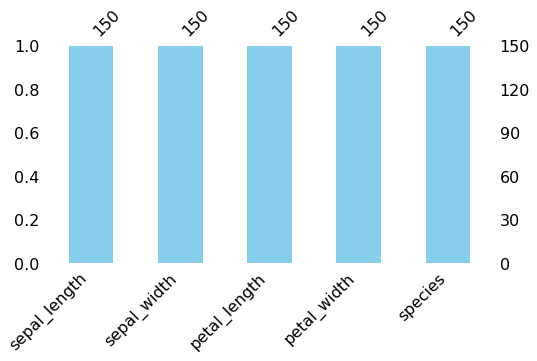

In [6]:
msno.bar(df,figsize=(8,4),color='skyblue')
plt.show()

## 4. Statistical Analysis

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
species,150,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 5. Parametric Visualization

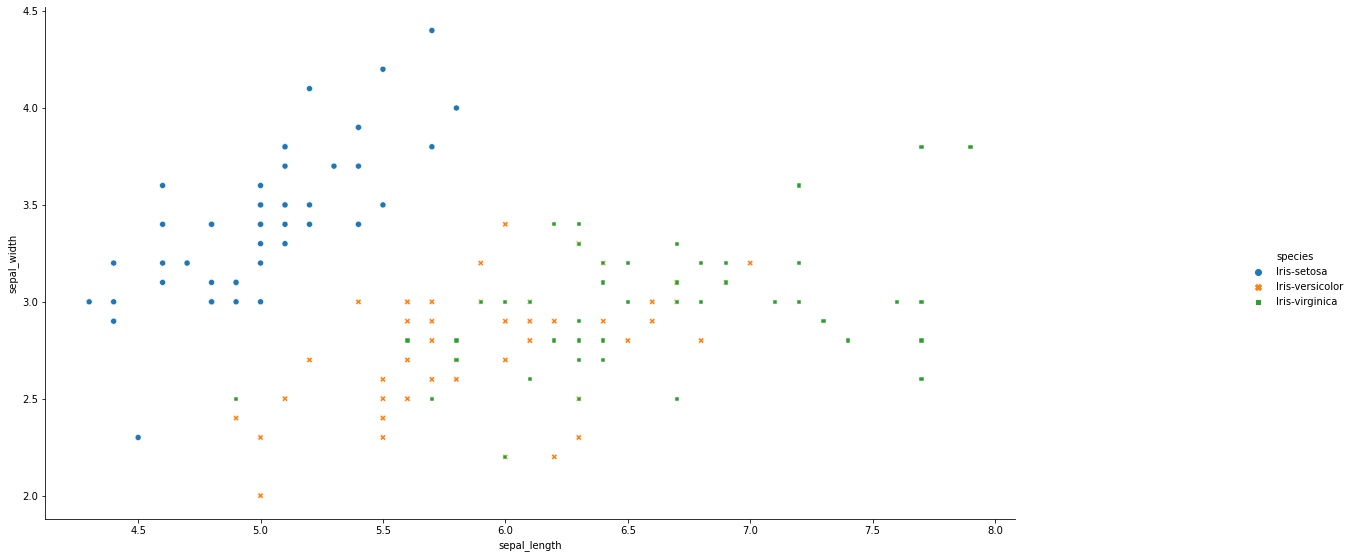

In [9]:
g=sns.relplot(x='sepal_length', y='sepal_width', data=df, hue='species', style='species')
g.fig.set_size_inches(20,8)
plt.show()

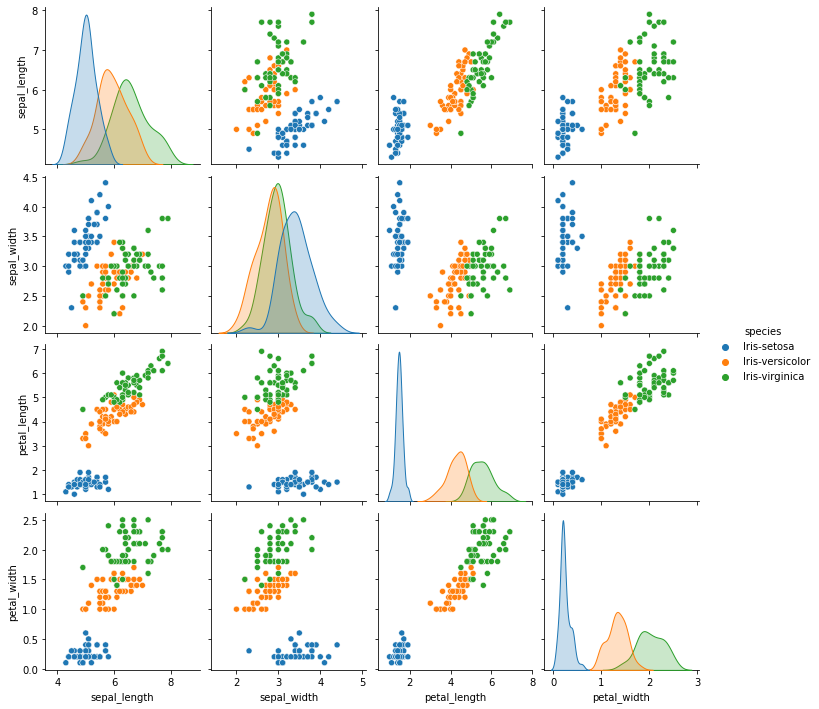

In [10]:
sns.pairplot(df, hue='species')
plt.show()

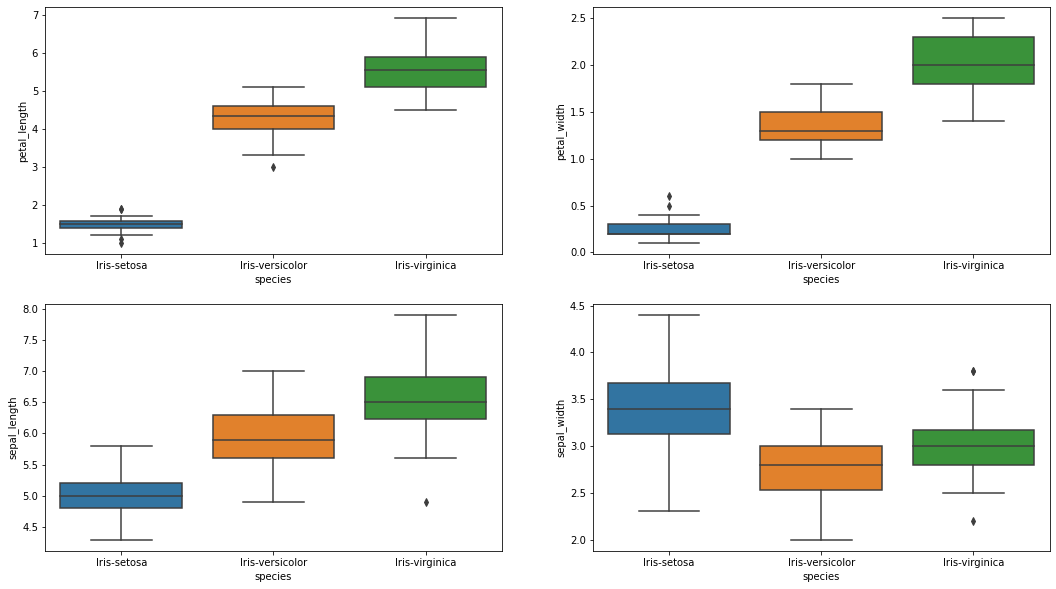

In [11]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='sepal_width',data=df)
plt.show()

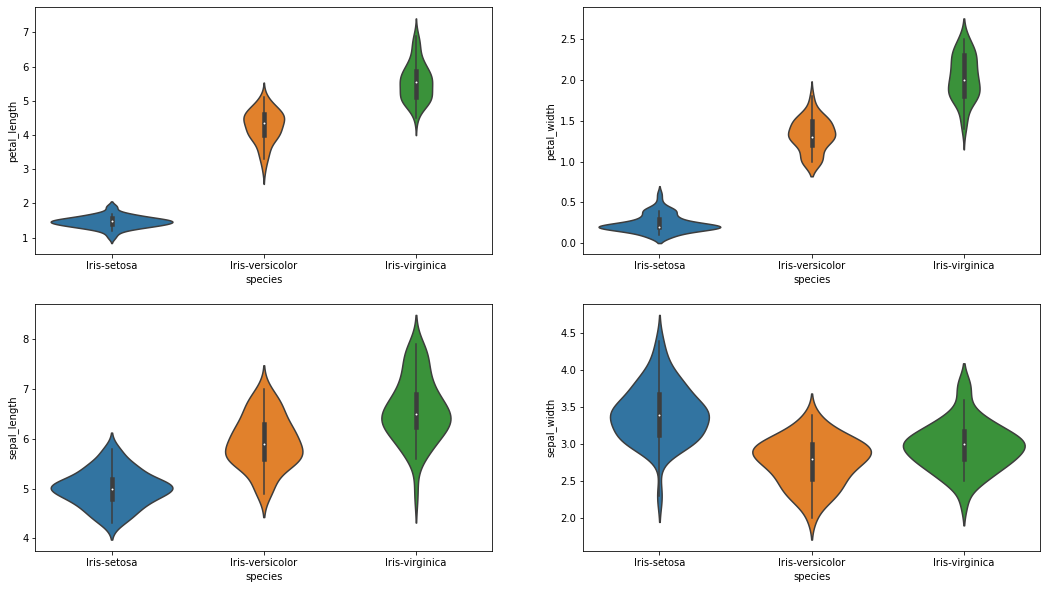

In [12]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.show()

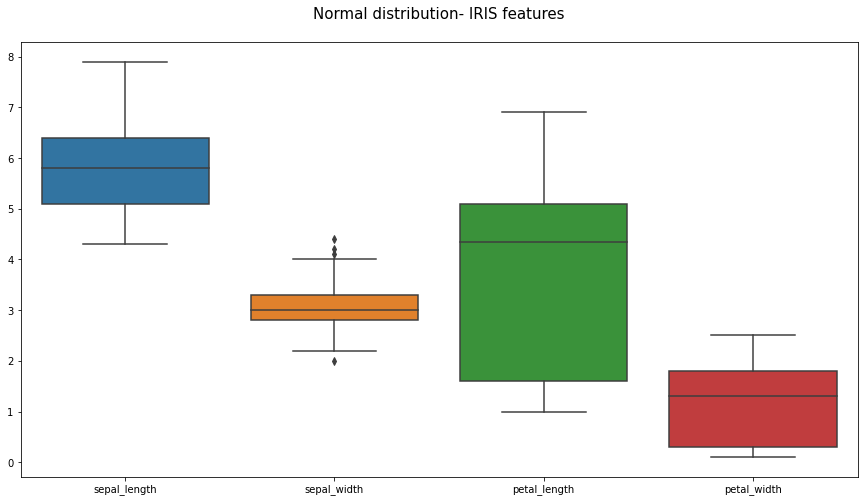

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df).set_title("Normal distribution- IRIS features\n",size=15)
plt.show()

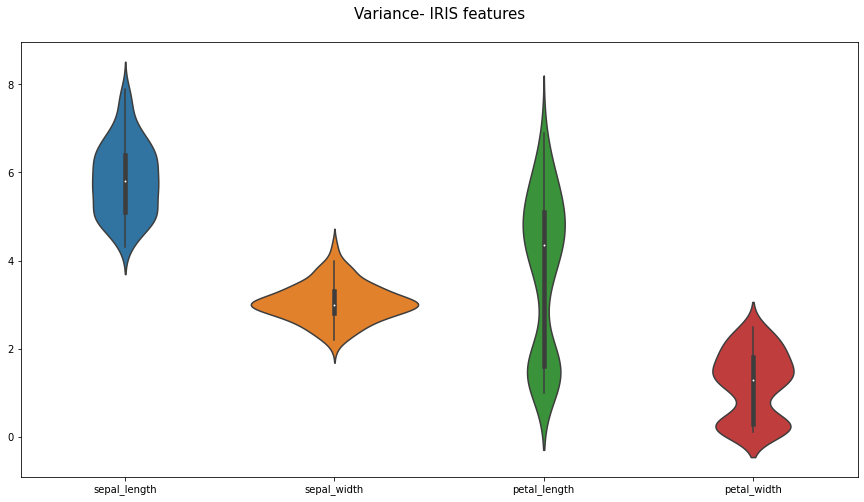

In [14]:
plt.figure(figsize=(15,8))
sns.violinplot(data=df).set_title("Variance- IRIS features\n",size=15)
plt.show()

## 6. Attribute Correlation

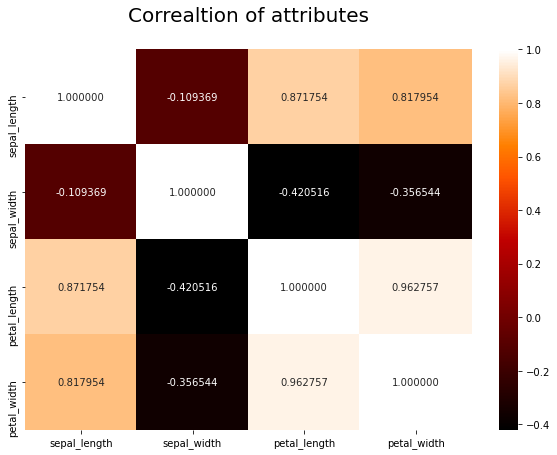

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='f',cmap='gist_heat').set_title('Correaltion of attributes\n',size=20)
plt.show()

In [16]:
x = df.iloc[:,0:4].values
y = df.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## 7. Metrics

In [17]:
from sklearn.metrics import make_scorer,accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

## 8. Model Selection

In [18]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state= 0)

## 9. Random Forest

In [19]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
acc_rf = round(accuracy_score(y_test,y_pred)*100,2)
rf_acc = round(rf.score(x_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

print("Accuracy of Random Forest = ",acc)
print("Precision of Random Forest = ",prec)
print("Recall of Random Forest = ",recall)
print("f1 score of Random Forest = ",f1)
print("Confusion matrix of Random Forest = \n",cm)

Accuracy of Random Forest =  1.0
Precision of Random Forest =  1.0
Recall of Random Forest =  1.0
f1 score of Random Forest =  1.0
Confusion matrix of Random Forest = 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## 10. Logistic Regression

In [20]:
lg = LogisticRegression(solver='lbfgs',max_iter=400)
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
acc_lg = round(accuracy_score(y_test,y_pred)*100,2)
lg_acc = round(lg.score(x_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

print("Accuracy of Logistic Regression = ",acc)
print("Precision of Logistic Regression = ",prec)
print("Recall of Logistic Regression = ",recall)
print("f1 score of Logistic Regression = ",f1)
print("Confusion matrix of Logistic Regression = \n",cm)

Accuracy of Logistic Regression =  1.0
Precision of Logistic Regression =  1.0
Recall of Logistic Regression =  1.0
f1 score of Logistic Regression =  1.0
Confusion matrix of Logistic Regression = 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## 11. K-Nearest Neighbours

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_test,y_pred)*100,2)
knn_acc = round(knn.score(x_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

print("Accuracy of K Nearest Neighbour = ",acc)
print("Precision of K Nearest Neighbour = ",prec)
print("Recall of K Nearest Neighbour = ",recall)
print("f1 score of K Nearest Neighbour = ",f1)
print("Confusion matrix of K Nearest Neighbour = \n",cm)

Accuracy of K Nearest Neighbour =  0.9666666666666667
Precision of K Nearest Neighbour =  0.9666666666666667
Recall of K Nearest Neighbour =  0.9666666666666667
f1 score of K Nearest Neighbour =  0.9666666666666667
Confusion matrix of K Nearest Neighbour = 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


## 12. KNN 

<ipython-input-22-7bd1cb20f685>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()


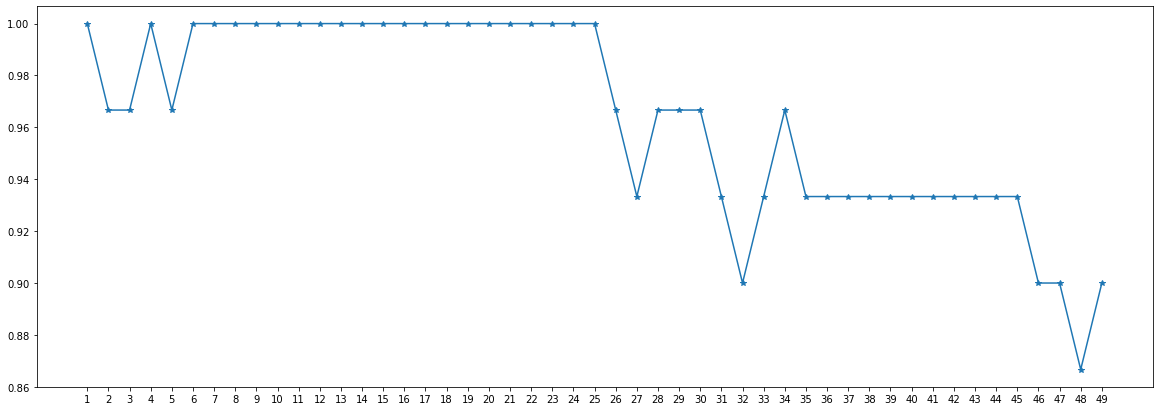

In [22]:
plt.figure(figsize=(20,7))
a_index = list(range(1,50))
a = pd.Series()
x = range(1,50)
for i in list(range(1,50)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  prediction = model.predict(x_test)
  a = a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index,a,marker="*")
plt.xticks(x)
plt.show()


## 13. Gaussian Naive Bayes

In [23]:
gauss = GaussianNB()
gauss.fit(x_train,y_train)
y_pred = gauss.predict(x_test)
acc_gauss = round(accuracy_score(y_test,y_pred)*100,2)
gauss_acc = round(gauss.score(x_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

print("Accuracy of K Nearest Neighbour = ",acc)
print("Precision of K Nearest Neighbour = ",prec)
print("Recall of K Nearest Neighbour = ",recall)
print("f1 score of K Nearest Neighbour = ",f1)
print("Confusion matrix of K Nearest Neighbour = \n",cm)

Accuracy of K Nearest Neighbour =  0.9666666666666667
Precision of K Nearest Neighbour =  0.9666666666666667
Recall of K Nearest Neighbour =  0.9666666666666667
f1 score of K Nearest Neighbour =  0.9666666666666667
Confusion matrix of K Nearest Neighbour = 
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


## 14. Linear Support Vector Classifier

In [24]:
lsvc = LinearSVC(max_iter=4000)
lsvc.fit(x_train,y_train)
y_pred = lsvc.predict(x_test)
acc_lsvc = round(accuracy_score(y_test,y_pred)*100,2)
lsvc_acc = round(lsvc.score(x_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

print("Accuracy of K Nearest Neighbour = ",acc)
print("Precision of K Nearest Neighbour = ",prec)
print("Recall of K Nearest Neighbour = ",recall)
print("f1 score of K Nearest Neighbour = ",f1)
print("Confusion matrix of K Nearest Neighbour = \n",cm)

Accuracy of K Nearest Neighbour =  1.0
Precision of K Nearest Neighbour =  1.0
Recall of K Nearest Neighbour =  1.0
f1 score of K Nearest Neighbour =  1.0
Confusion matrix of K Nearest Neighbour = 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## 15. Decision Tree Classifier

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc_dt = round(accuracy_score(y_test,y_pred)*100,2)
dt_acc = round(dt.score(x_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

print("Accuracy of K Nearest Neighbour = ",acc)
print("Precision of K Nearest Neighbour = ",prec)
print("Recall of K Nearest Neighbour = ",recall)
print("f1 score of K Nearest Neighbour = ",f1)
print("Confusion matrix of K Nearest Neighbour = \n",cm)

Accuracy of K Nearest Neighbour =  1.0
Precision of K Nearest Neighbour =  1.0
Recall of K Nearest Neighbour =  1.0
f1 score of K Nearest Neighbour =  1.0
Confusion matrix of K Nearest Neighbour = 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## 16. Model Scorer

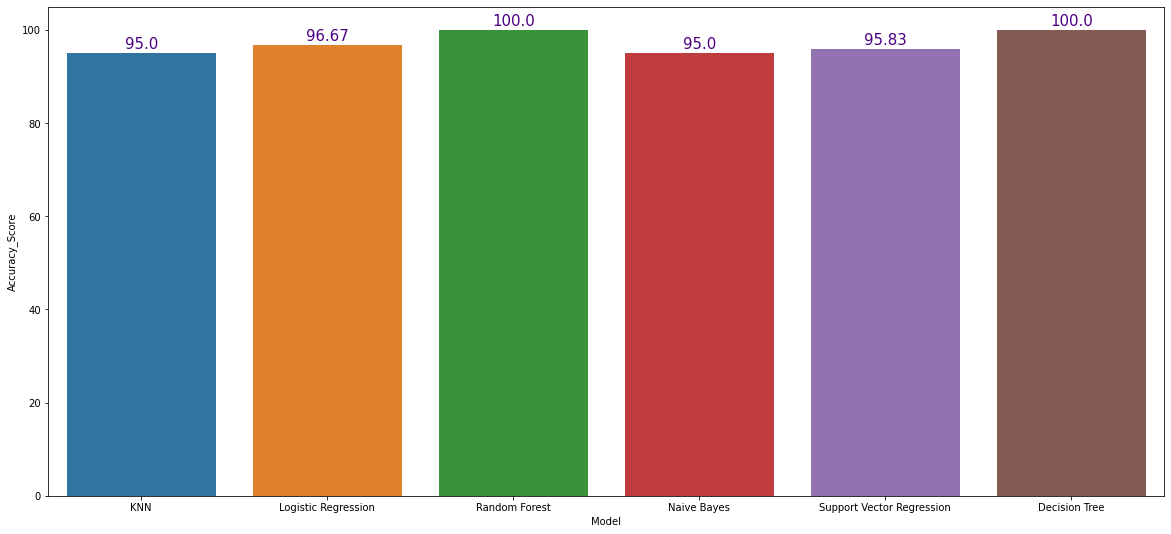

In [27]:
output = pd.DataFrame(
    {
        'Model':['KNN','Logistic Regression','Random Forest','Naive Bayes','Support Vector Regression','Decision Tree'],
     'Score':[acc_knn,acc_lg,acc_rf,acc_gauss,acc_lsvc,acc_dt],
     'Accuracy_Score':[knn_acc,lg_acc,rf_acc,gauss_acc,lsvc_acc,dt_acc]
    }
)


output
plt.figure(figsize=(20,9))
ax = sns.barplot(x='Model',y='Accuracy_Score',data=output)
labels = (output['Accuracy_Score'])
for i,v in enumerate(labels):
  ax.text(i,v+1,str(v),horizontalalignment='center',size=15,color='indigo')

### This dataset is best predicted using non- linear classifiers like a random forest classifier or a decision tree classifier. This happens as the two species have many similar features and differ by some insignificant differences in a combination of features, which cannot be separated by any form of regression.